# Data Load

In [ ]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import time
import re

pd.set_option('display.max_columns', 200)

plt.style.use('bmh')

%matplotlib inline

In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the sample course dataset
course_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Bismillah/Final/Code/udemy_sample_30.csv')
course_data.head()

,id,course_id,rate,date,display_name,comment,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url,image
0,24371058,1285808,5.0,2018-12-11T20:50:07-08:00,Solihu Gaffar,Well has a beginner things are getting clearer...,Java for Complete Beginners,True,19.99,The Course Where Programming and Fun Meet! Lea...,43631,4.250000,3137,568,43,376,2017-10-30 23:37:17+00:00,2020-12-07,Development,Programming Languages,Java,English,/course/java-for-complete-beginners/,Rupal T,/user/rupal-totale/,https://img-b.udemycdn.com/course/750x422/1285...
1,10287048,1049154,3.0,2017-10-16T06:46:18-07:00,Mark,The pause functionality does not repond,SAP Financial Accounting and Controlling Super...,True,69.99,A complete Beginner and Intermediate SAP FICO ...,5526,4.315790,1110,219,23,379,2016-12-27 16:41:23+00:00,2018-02-02,Office Productivity,SAP,SAP Financial Accounting,English,/course/sap-financial-accounting-and-controlli...,SAP Academy,/user/sadim-rasheed-3/,https://img-c.udemycdn.com/course/750x422/1049...
2,16934964,874012,5.0,2018-05-25T21:22:46-07:00,Nilaksh,Very good one but when you will teach sketch.,The Ultimate Drawing Course - Beginner to Adva...,True,149.99,Learn the #1 most important building block of ...,490520,4.619531,115533,22341,65,669,2017-01-23 00:20:05+00:00,2022-03-16,Design,Graphic Design & Illustration,Drawing,English,/course/the-ultimate-drawing-course-beginner-t...,Jaysen Batchelor,/user/jaysen-batchelor/,https://img-c.udemycdn.com/course/750x422/8740...
3,62115688,1255136,4.0,2020-07-24T10:59:01-07:00,Harshit,I am liking the detailed explanation. The only...,Technical Analysis MasterClass:Trading By Tech...,True,199.99,Stock Market Technical Analysis Secrets for Fo...,96528,4.471567,18973,3684,74,459,2017-07-21 22:53:45+00:00,2022-06-19,Finance & Accounting,Investing & Trading,Technical Analysis (finance),English,/course/technical_analysis/,"Jyoti Bansal (NCFM,NISM Certified Technical An...",/user/jyoti-bansal-4/,https://img-c.udemycdn.com/course/750x422/1255...
4,7715278,1209412,3.5,2017-06-23T02:02:50-07:00,Nagmani,- For a new beginer as well as intermediate pe...,Ansible for the Absolute Beginner - Hands-On -...,True,99.99,This course introduces Ansible to the absolute...,121389,4.585908,31301,4774,35,138,2017-05-25 20:31:52+00:00,2022-10-05,IT & Software,Other IT & Software,Ansible,English,/course/learn-ansible/,Mumshad Mannambeth,/user/mumshad-mannambeth/,https://img-c.udemycdn.com/course/750x422/1209...


In [ ]:
# show general info
course_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79077 entries, 0 to 79076
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  79077 non-null  int64  
 1   course_id           79077 non-null  int64  
 2   rate                79077 non-null  float64
 3   date                79077 non-null  object 
 4   display_name        79077 non-null  object 
 5   comment             79077 non-null  object 
 6   title               79077 non-null  object 
 7   is_paid             79077 non-null  bool   
 8   price               79077 non-null  float64
 9   headline            79077 non-null  object 
 10  num_subscribers     79077 non-null  int64  
 11  avg_rating          79077 non-null  float64
 12  num_reviews         79077 non-null  int64  
 13  num_comments        79077 non-null  int64  
 14  num_lectures        79077 non-null  int64  
 15  content_length_min  79077 non-null  int64  
 16  publ

In [ ]:
# get general sense of the data
course_data.describe()

,id,course_id,rate,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
count,7.907700e+04,7.907700e+04,79077.000000,79077.000000,7.907700e+04,79077.000000,79077.000000,79077.000000,79077.000000,79077.000000
mean,5.414643e+07,1.435064e+06,4.508814,125.103700,1.295878e+05,4.494631,28395.825221,4140.204889,143.108110,843.082616
std,3.749011e+07,1.035744e+06,0.858114,79.007492,2.352246e+05,0.268680,60455.036592,7366.985448,163.122072,990.989045
min,1.441000e+03,7.723000e+03,0.500000,0.000000,1.000000e+00,1.000000,1.000000,1.000000,3.000000,19.000000
25%,1.981014e+07,6.732220e+05,4.000000,49.990000,7.576000e+03,4.423077,796.000000,171.000000,37.000000,189.000000
50%,5.040158e+07,1.187016e+06,5.000000,149.990000,3.211500e+04,4.561521,4664.000000,835.000000,78.000000,467.000000
75%,8.303134e+07,1.923692e+06,5.000000,199.990000,1.441630e+05,4.650000,26166.000000,4281.000000,181.000000,1161.000000
max,1.267084e+08,4.904954e+06,5.000000,999.000000,1.612862e+06,5.000000,436457.000000,39040.000000,987.000000,11397.000000


# KNN Recommender System

In [ ]:
## Install Surprise
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357258 sha256=09ec9b91c4c51583b1ac3e855380cf1992601164d63931f3728cc027a098dca5
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset
from surprise import Reader
from surprise import KNNBasic, KNNWithMeans

from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse, mae

In [ ]:
sample_data = course_data[['display_name', 'course_id', 'rate']]
sample_data = sample_data.rename({'display_name': 'user_name'})

In [ ]:
# the model takes 3 features; id, course_id
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(sample_data, reader)

train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

In [ ]:
# Number of k_neighbors for each similarity

similarity_name = ['MSD', 'cosine', 'pearson_baseline']

k_neighbors = [3, 5, 7, 9, 11]
dict_scores = {}

for sim in similarity_name:

    sim_options = {'name' : sim, 'user_based' : False}

    rmse_basic_score = []
    mae_basic_score = []

    for k in k_neighbors:

        # KNN with means; means of rating
        knn = KNNBasic(k=k, sim_options=sim_options, verbose=True)
        knn.fit(train_data)

        predictions = knn.test(test_data)
        rmse_basic_score.append(rmse(predictions))
        mae_basic_score.append(mae(predictions))

    dict_scores[sim + '_rmse'] = rmse_basic_score
    dict_scores[sim + '_mae'] = mae_basic_score


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9063
MAE:  0.6167
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8986
MAE:  0.6143
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8954
MAE:  0.6127
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8939
MAE:  0.6120
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8930
MAE:  0.6113
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9084
MAE:  0.6232
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8973
MAE:  0.6186
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8934
MAE:  0.6160
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8915
MAE:  0.6152
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8899
MAE:  0.

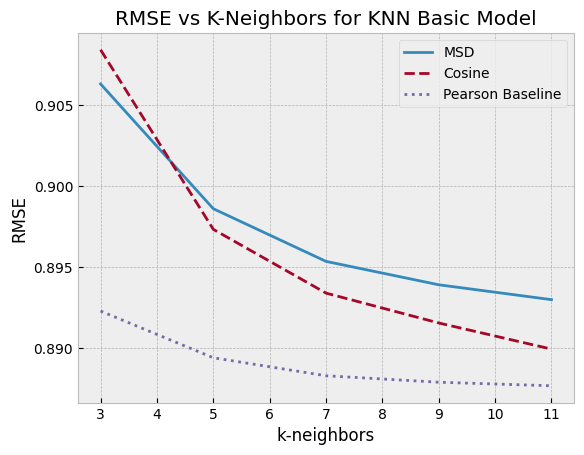

In [ ]:
plt.plot(k_neighbors, dict_scores['MSD_rmse'], label = 'MSD')
plt.plot(k_neighbors, dict_scores['cosine_rmse'], label = 'Cosine', linestyle = 'dashed')
plt.plot(k_neighbors, dict_scores['pearson_baseline_rmse'], label = 'Pearson Baseline', linestyle='dotted')
plt.xlabel('k-neighbors')
plt.ylabel('RMSE')
plt.title('RMSE vs K-Neighbors for KNN Basic Model')
plt.legend()
plt.savefig('rmse_k knnbasic.png')
plt.show()

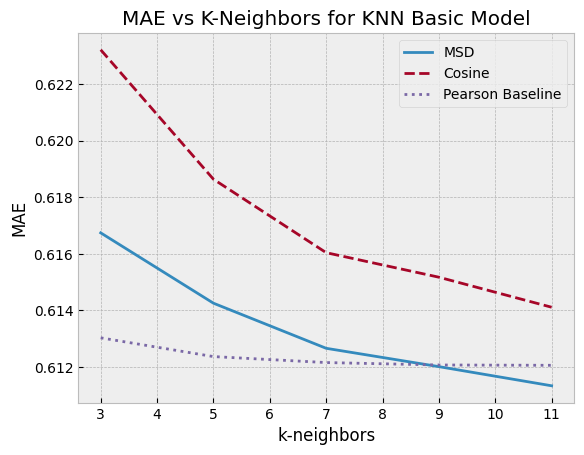

In [ ]:
plt.plot(k_neighbors, dict_scores['MSD_mae'], label = 'MSD')
plt.plot(k_neighbors, dict_scores['cosine_mae'], label = 'Cosine', linestyle = 'dashed')
plt.plot(k_neighbors, dict_scores['pearson_baseline_mae'], label = 'Pearson Baseline', linestyle='dotted')
plt.xlabel('k-neighbors')
plt.ylabel('MAE')
plt.title('MAE vs K-Neighbors for KNN Basic Model')
plt.legend()
plt.savefig('mae_k knnbasic.png')
plt.show()

In [ ]:
# Number of k_neighbors for each similarity

similarity_name = ['MSD', 'cosine', 'pearson_baseline']

k_neighbors = [3, 5, 7, 9, 11]
dict_scores_means = {}

for sim in similarity_name:

    sim_options = {'name' : sim, 'user_based' : False}

    rmse_means_score = []
    mae_means_score = []

    for k in k_neighbors:

        # KNN with means; means of rating
        knn = KNNWithMeans(k=k, sim_options=sim_options, verbose=True)
        knn.fit(train_data)

        predictions = knn.test(test_data)
        rmse_means_score.append(rmse(predictions))
        mae_means_score.append(mae(predictions))

    dict_scores_means[sim + '_rmse'] = rmse_means_score
    dict_scores_means[sim + '_mae'] = mae_means_score


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9279
MAE:  0.6292
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9223
MAE:  0.6258
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9201
MAE:  0.6242
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9190
MAE:  0.6234
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9183
MAE:  0.6227
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9279
MAE:  0.6291
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9213
MAE:  0.6256
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9188
MAE:  0.6234
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9175
MAE:  0.6227
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9162
MAE:  0.

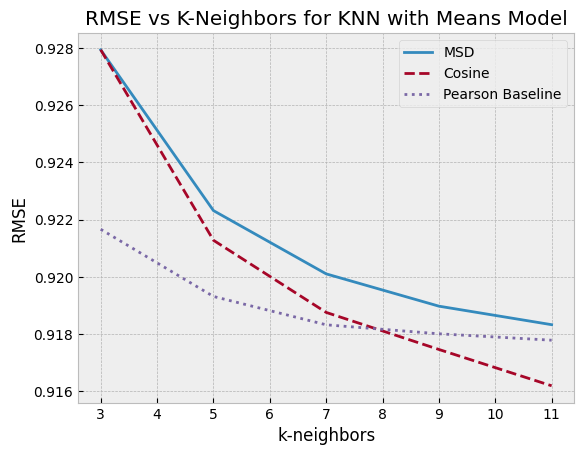

In [ ]:
plt.plot(k_neighbors, dict_scores_means['MSD_rmse'], label = 'MSD')
plt.plot(k_neighbors, dict_scores_means['cosine_rmse'], label = 'Cosine', linestyle = 'dashed')
plt.plot(k_neighbors, dict_scores_means['pearson_baseline_rmse'], label = 'Pearson Baseline', linestyle='dotted')
plt.xlabel('k-neighbors')
plt.ylabel('RMSE')
plt.title('RMSE vs K-Neighbors for KNN with Means Model')
plt.legend()
plt.savefig('rmse_k knnmeans.png')
plt.show()

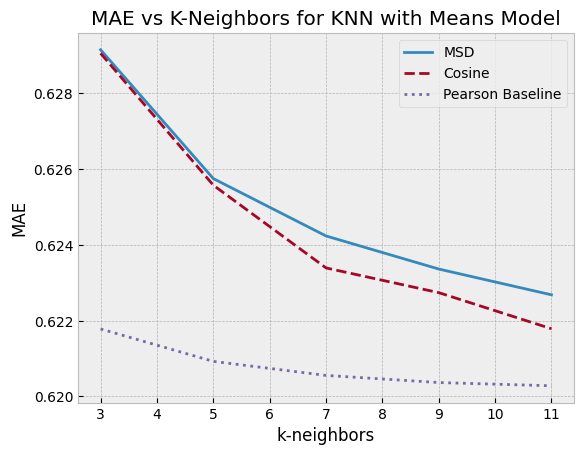

In [ ]:
plt.plot(k_neighbors, dict_scores_means['MSD_mae'], label = 'MSD')
plt.plot(k_neighbors, dict_scores_means['cosine_mae'], label = 'Cosine', linestyle = 'dashed')
plt.plot(k_neighbors, dict_scores_means['pearson_baseline_mae'], label = 'Pearson Baseline', linestyle='dotted')
plt.xlabel('k-neighbors')
plt.ylabel('MAE')
plt.title('MAE vs K-Neighbors for KNN with Means Model')
plt.legend()
plt.savefig('mae_k knnmeans.png')
plt.show()